In [5]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [22]:
dataset = "Datas/"

In [23]:
# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 294


In [24]:
#Normalise images
images = np.array(images)
images /= 255.0

In [25]:
#convert datas to dummyvalues
labels_loc = np.array(pd.get_dummies(labels_loc))

(array([1, 0, 0, 0, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x1e400be8ef0>)

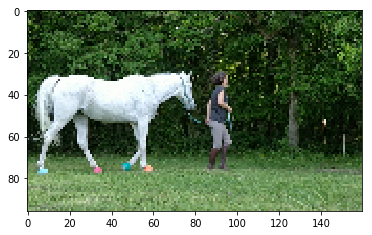

In [26]:
labels_loc[42], plt.imshow(images[42])

In [13]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [14]:
#from keras.models import load_model
#model = load_model("model.h5")

In [15]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(5, activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [16]:
model_name="model.h5"

In [17]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [18]:
h = model.fit(images, labels_loc, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 283 samples, validate on 71 samples
Epoch 1/100
283/283 [==============================] - 6s 22ms/step - loss: 2.0242 - acc: 0.2085 - val_loss: 1.3999 - val_acc: 0.3521

Epoch 00001: val_loss improved from inf to 1.39992, saving model to model.h5
Epoch 2/100
283/283 [==============================] - 6s 21ms/step - loss: 1.6820 - acc: 0.3145 - val_loss: 1.0919 - val_acc: 0.7887

Epoch 00002: val_loss improved from 1.39992 to 1.09195, saving model to model.h5
Epoch 3/100
283/283 [==============================] - 7s 23ms/step - loss: 1.3853 - acc: 0.4346 - val_loss: 0.8910 - val_acc: 0.8592

Epoch 00003: val_loss improved from 1.09195 to 0.89099, saving model to model.h5
Epoch 4/100
283/283 [==============================] - 7s 24ms/step - loss: 1.1862 - acc: 0.4982 - val_loss: 0.6880 - val_acc: 0.8873

Epoch 00004: val_loss improved from 0.89099 to 0.68797, saving model to model.h5
Epoch 5/100
283/283 [==============================] - 6s 23ms/step - loss: 1.0510 - acc: 0.611

KeyboardInterrupt: 

In [20]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

NameError: name 'h' is not defined